In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
# https://www.coingecko.com/en/coins/bitcoin/historical_data

In [3]:
# https://www.coingecko.com/en/coins/bitcoin/historical_data
data = pd.read_csv('/kaggle/input/btc-usd-max/btc-usd-max.csv')
data

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.300000,1.500518e+09,0.000000e+00
1,2013-04-29 00:00:00 UTC,141.960000,1.575032e+09,0.000000e+00
2,2013-04-30 00:00:00 UTC,135.300000,1.501657e+09,0.000000e+00
3,2013-05-01 00:00:00 UTC,117.000000,1.298952e+09,0.000000e+00
4,2013-05-02 00:00:00 UTC,103.430000,1.148668e+09,0.000000e+00
...,...,...,...,...
4004,2024-04-16 00:00:00 UTC,63430.571457,1.247929e+12,4.279660e+10
4005,2024-04-17 00:00:00 UTC,63720.501587,1.253671e+12,4.215717e+10
4006,2024-04-18 00:00:00 UTC,61328.897989,1.207185e+12,4.112336e+10
4007,2024-04-19 00:00:00 UTC,63461.592695,1.249566e+12,3.590162e+10


In [4]:
data.drop(columns=['market_cap', 'total_volume'], inplace=True)
data

,snapped_at,price
0,2013-04-28 00:00:00 UTC,135.300000
1,2013-04-29 00:00:00 UTC,141.960000
2,2013-04-30 00:00:00 UTC,135.300000
3,2013-05-01 00:00:00 UTC,117.000000
4,2013-05-02 00:00:00 UTC,103.430000
...,...,...
4004,2024-04-16 00:00:00 UTC,63430.571457
4005,2024-04-17 00:00:00 UTC,63720.501587
4006,2024-04-18 00:00:00 UTC,61328.897989
4007,2024-04-19 00:00:00 UTC,63461.592695


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   snapped_at  4009 non-null   object 
 1   price       4009 non-null   float64
dtypes: float64(1), object(1)
memory usage: 62.8+ KB


In [6]:
data.rename(columns={'snapped_at':'date'}, inplace=True)
data

,date,price
0,2013-04-28 00:00:00 UTC,135.300000
1,2013-04-29 00:00:00 UTC,141.960000
2,2013-04-30 00:00:00 UTC,135.300000
3,2013-05-01 00:00:00 UTC,117.000000
4,2013-05-02 00:00:00 UTC,103.430000
...,...,...
4004,2024-04-16 00:00:00 UTC,63430.571457
4005,2024-04-17 00:00:00 UTC,63720.501587
4006,2024-04-18 00:00:00 UTC,61328.897989
4007,2024-04-19 00:00:00 UTC,63461.592695


In [7]:
data['date'] = pd.to_datetime(data['date'])

In [8]:
def draw_plot(data):
    # Đảm bảo cột 'date' có định dạng datetime
    data['date'] = pd.to_datetime(data['date'])

    # Tạo cột 'year' để lưu năm của mỗi ngày
    data['year'] = data['date'].dt.year

    # Tính mean và variance theo từng năm
    mean_by_year = data.groupby('year')['price'].mean()
    variance_by_year = data.groupby('year')['price'].var()

    # Vẽ biểu đồ
    plt.figure(figsize=(20, 6))

    # Vẽ dữ liệu gốc
    plt.plot(data['date'], data['price'], c='orange', label='True values')

    # Vẽ đường mean và variance theo từng năm
    for year, mean in mean_by_year.items():
        plt.plot(data[data['year'] == year]['date'], [mean] * len(data[data['year'] == year]['date']), color='r', linestyle='--', label=f'Mean - {year}')
        
    for year, variance in variance_by_year.items():
        plt.plot(data[data['year'] == year]['date'], [mean_by_year[year] + np.sqrt(variance)] * len(data[data['year'] == year]['date']), color='g', linestyle='--', label=f'Mean + Variance - {year}')
        plt.plot(data[data['year'] == year]['date'], [mean_by_year[year] - np.sqrt(variance)] * len(data[data['year'] == year]['date']), color='g', linestyle='--', label=f'Mean - Variance - {year}')

    # Cấu hình biểu đồ
    plt.xlabel("Date", fontsize=16)
    plt.ylabel("Price", fontsize=16)
    plt.title("BTC Price with Mean and Variance by Year", fontsize=16)
    plt.show()


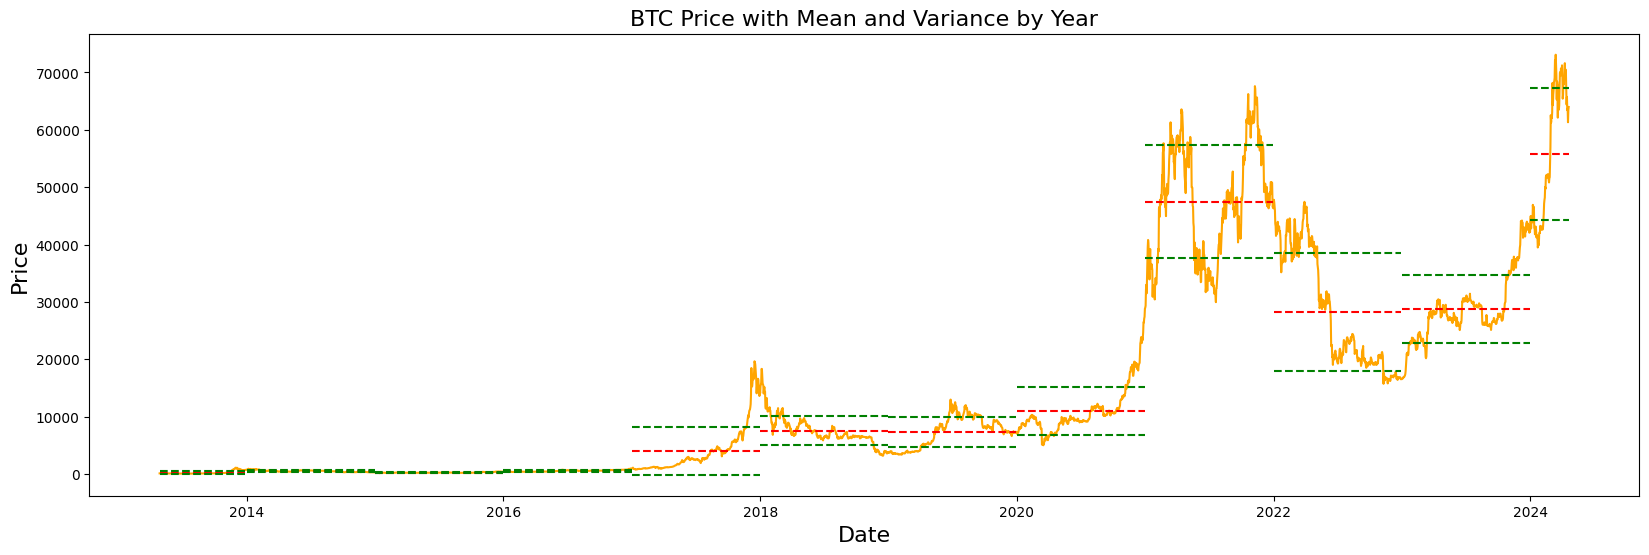

In [9]:
draw_plot(data)

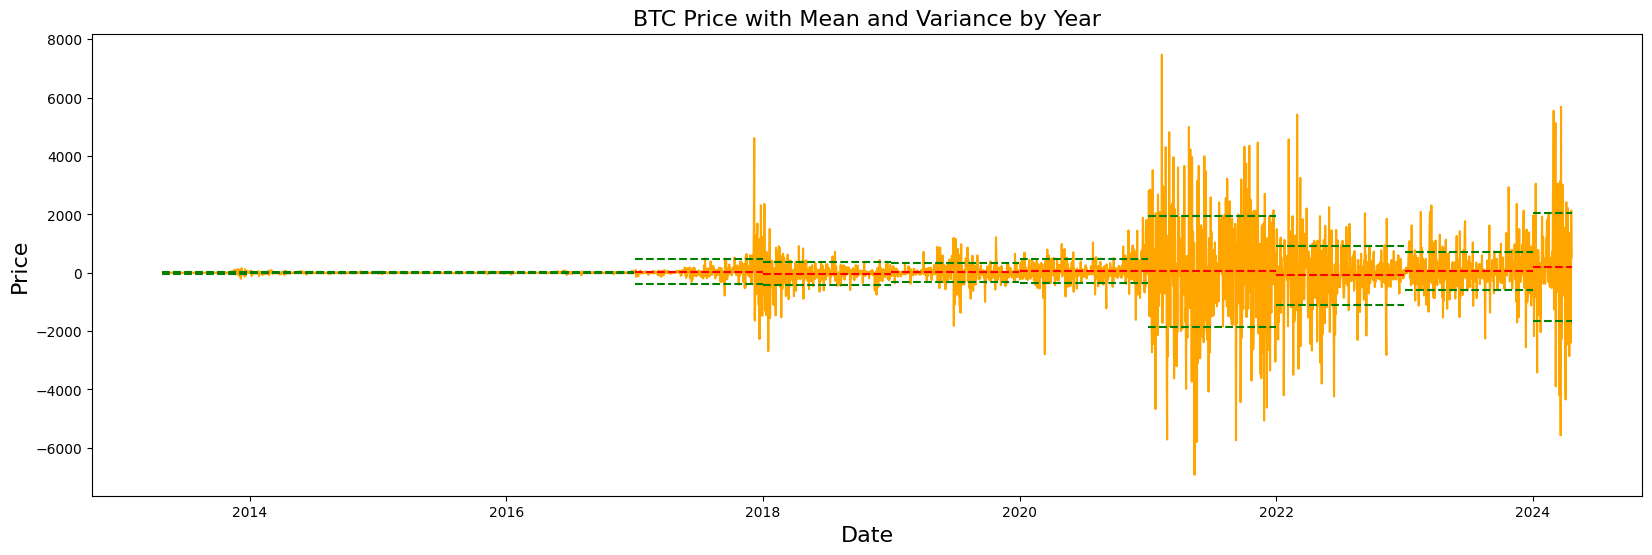

In [10]:
#First-order differencing
df_diff = data.copy()
df_diff['price'] = data['price'].diff()
draw_plot(df_diff)

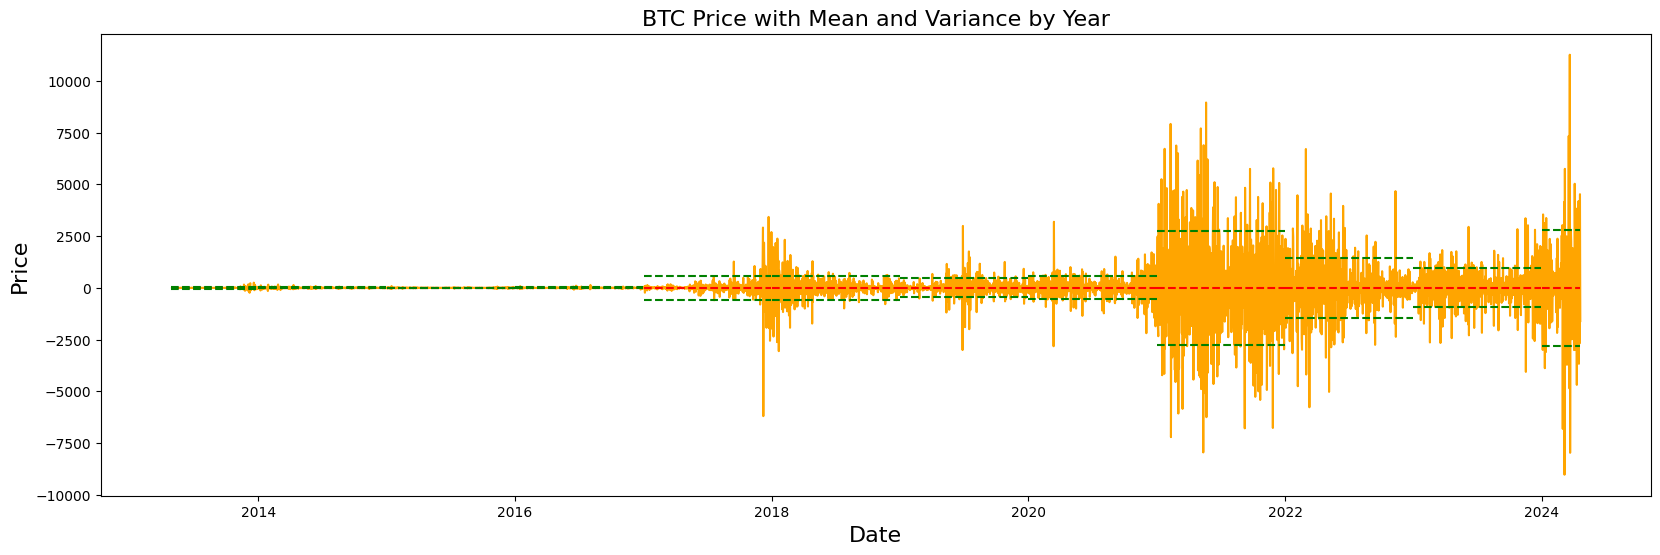

In [11]:
#Second-order differencing
df_2diff = data.copy()
df_2diff['price'] = data['price'].diff().diff()
draw_plot(df_2diff)

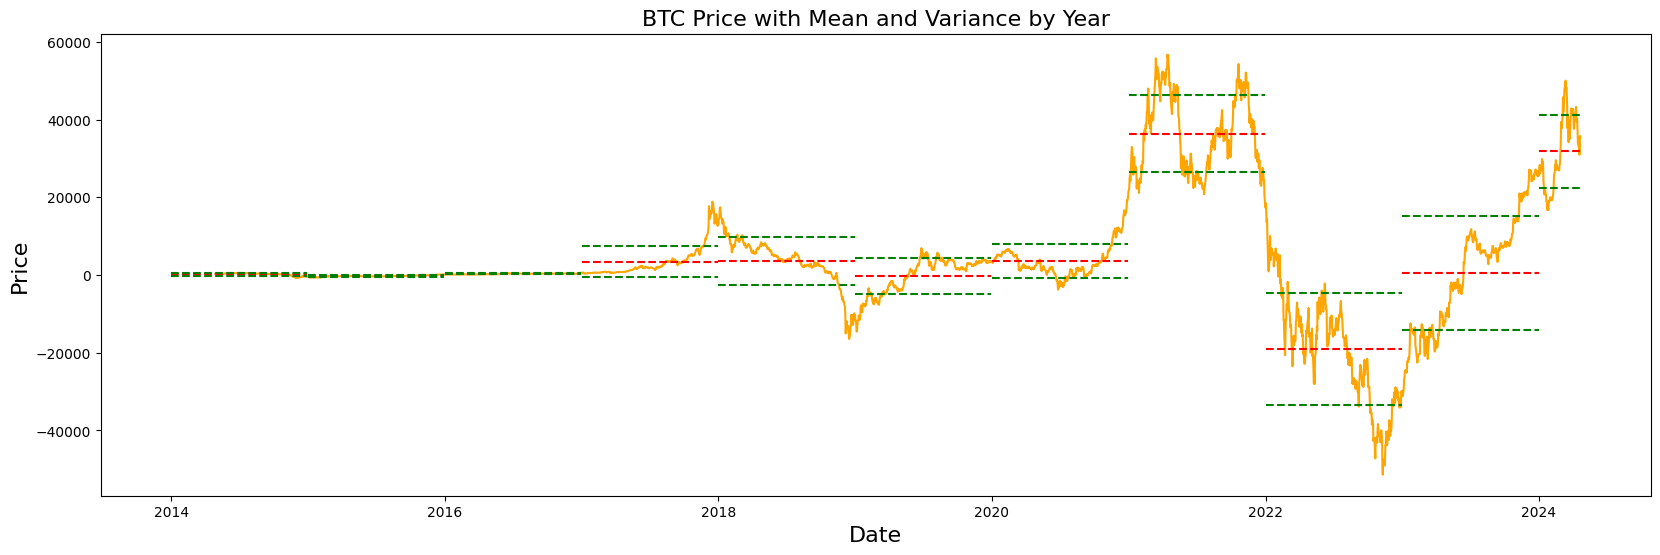

In [12]:
#Seasonal-order differencing
df_ssdiff = data.copy()
df_ssdiff['price'] = data['price'].diff(periods=365)
draw_plot(df_ssdiff)

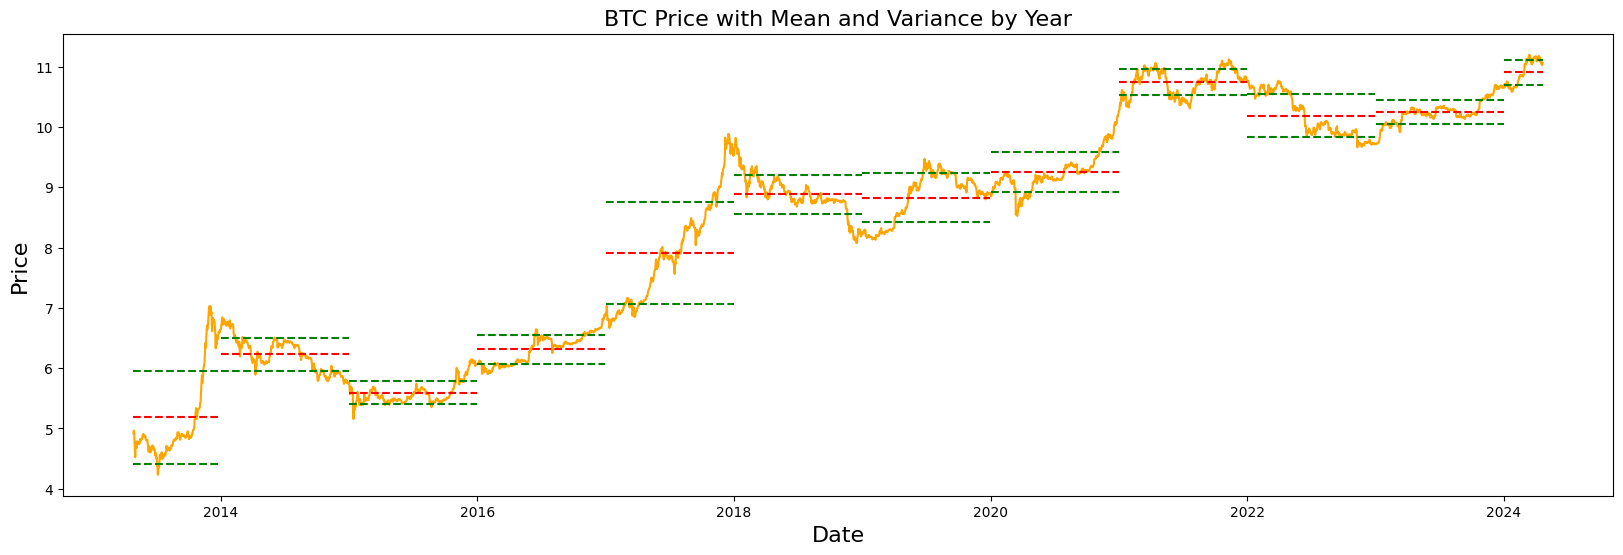

In [13]:
#Log transformation
df_logt = data.copy()
df_logt['price'] = np.log1p(data['price'])
draw_plot(df_logt)

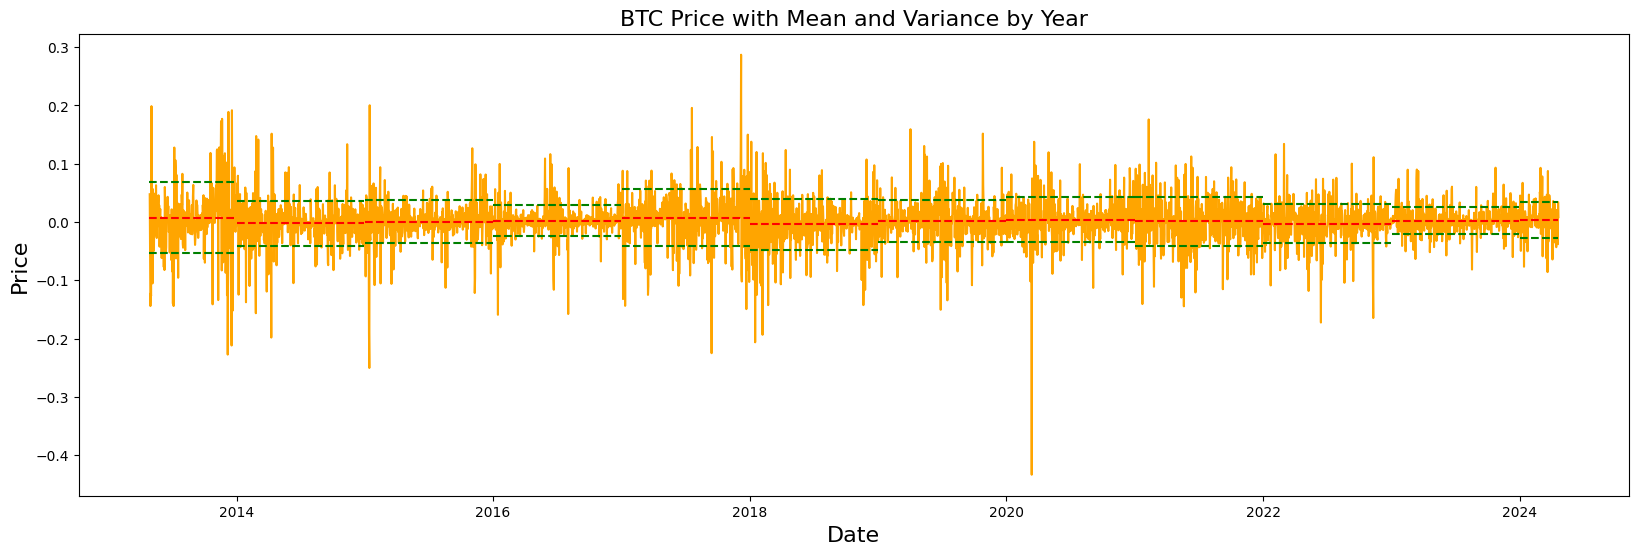

In [14]:
#Log transformation + First-order differencing
df_logt_diff = df_logt.copy()
df_logt_diff['price'] = df_logt['price'].diff()
draw_plot(df_logt_diff)

In [15]:
#Rolling window by year
data_year_mean = data.copy()
data_year_mean['price'] = data['price'].rolling(window=365).mean()

In [16]:
#Rolling window by month
data_month_mean = data.copy()
data_month_mean['price'] = data['price'].rolling(window=30).mean()

In [17]:
#Expending window
data_expand = data.copy()
data_expand['price'] = data['price'].expanding().mean()

Text(0.5, 1.0, 'BTC Price')

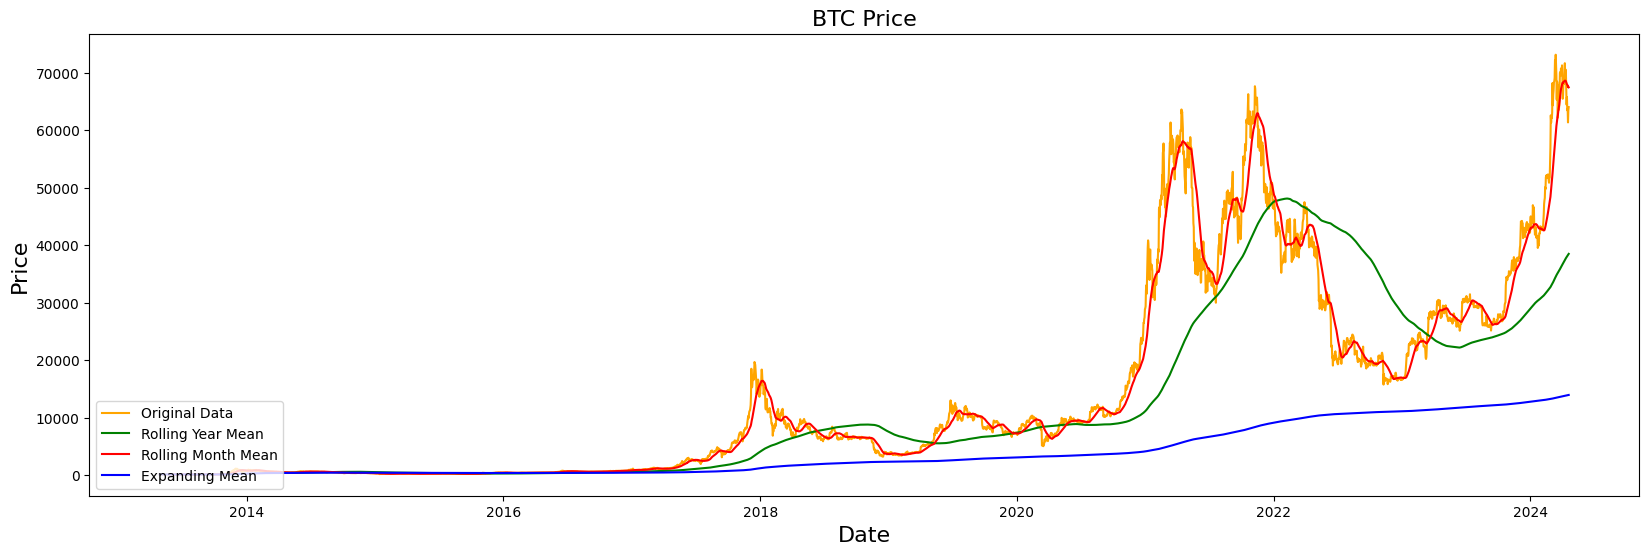

In [18]:
plt.figure(figsize=(20,6))
plt.plot(data['date'], data['price'], c='orange',label='Original Data')
plt.plot(data_year_mean['date'], data_year_mean['price'], c='green',label='Rolling Year Mean')
plt.plot(data_month_mean['date'], data_month_mean['price'], c='red',label='Rolling Month Mean')
plt.plot(data_expand['date'], data_expand['price'], c='blue',label='Expanding Mean')

plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("BTC Price", fontsize=16)

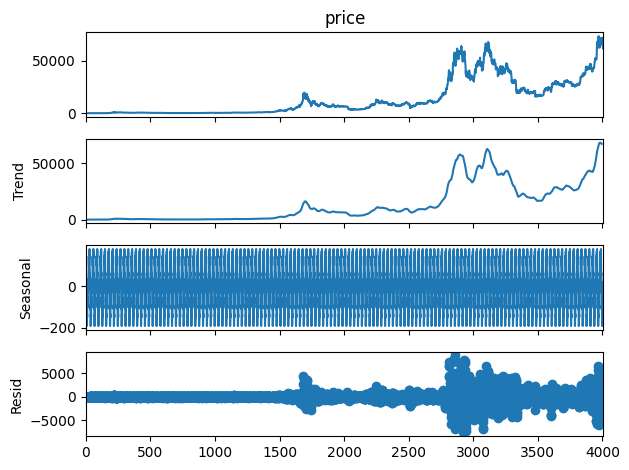

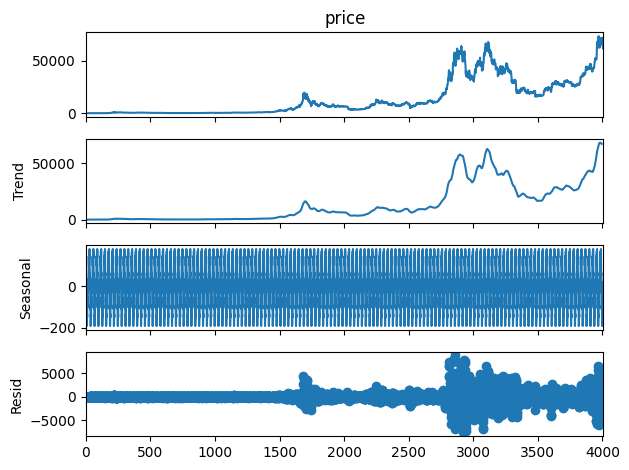

In [19]:
#Series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['price'], model='additive', period=30)
decomposition.plot()

In [20]:
data['trend'] = decomposition.trend
data['seasonal'] = decomposition.seasonal
data

,date,price,year,trend,seasonal
0,2013-04-28 00:00:00+00:00,135.300000,2013,NaN,50.708370
1,2013-04-29 00:00:00+00:00,141.960000,2013,NaN,64.320956
2,2013-04-30 00:00:00+00:00,135.300000,2013,NaN,37.237184
3,2013-05-01 00:00:00+00:00,117.000000,2013,NaN,7.262416
4,2013-05-02 00:00:00+00:00,103.430000,2013,NaN,-109.144728
...,...,...,...,...,...
4004,2024-04-16 00:00:00+00:00,63430.571457,2024,NaN,-101.985902
4005,2024-04-17 00:00:00+00:00,63720.501587,2024,NaN,-8.241908
4006,2024-04-18 00:00:00+00:00,61328.897989,2024,NaN,-32.489174
4007,2024-04-19 00:00:00+00:00,63461.592695,2024,NaN,-9.472879


In [21]:
data['trend'] = data['trend'].ffill()
data['trend'] = data['trend'].bfill()
data['trend']

0         119.831750
1         119.831750
2         119.831750
3         119.831750
4         119.831750
            ...     
4004    67487.441176
4005    67487.441176
4006    67487.441176
4007    67487.441176
4008    67487.441176
Name: trend, Length: 4009, dtype: float64

In [22]:
# split data
split_date = '2022-04-20'
train_data = data[data['date'] <= split_date]
test_data = data[data['date'] > split_date]

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.loc[:, 'price'] = scaler.fit_transform(data[['price']])

scaler_train = StandardScaler()
train_data.loc[:, 'price'] = scaler_train.fit_transform(train_data[['price']])

scaler_test = StandardScaler()
test_data.loc[:, 'price'] = scaler_test.fit_transform(test_data[['price']])


In [24]:
print("       |        scale        |       mean        |      variance      ")
print("---------------------------------------------------------------------------")
print(f'scaler |  {scaler.scale_[0]}  | {scaler.mean_[0]} | {scaler.var_[0]}')
print(f'train  |  {scaler_train.scale_[0]} | {scaler_train.mean_[0]}| {scaler_train.var_[0]}')
print(f'test   |  {scaler_test.scale_[0]} | {scaler_test.mean_[0]} | {scaler_test.var_[0]}')


       |        scale        |       mean        |      variance      
---------------------------------------------------------------------------
scaler |  17247.32137673729  | 13938.49130891423 | 297470094.6724591
train  |  15783.294719703143 | 10197.331837074169| 249112392.2090091
test   |  13042.608038694358 | 30714.85348222713 | 170109624.45101467


# Scaling on the entire dataset is chosen due to the higher mean in the test data compared to the training data.

In [25]:
# re-applied data with scaled price
split_date = '2022-04-20'
train_data = data[data['date'] <= split_date]
test_data = data[data['date'] > split_date]

# RNN, LSTM, GRU

In [26]:
X_train = train_data['date']
y_train = train_data['price']

X_test = test_data['date']
y_test = test_data['price']

In [27]:
n_features = 1

train_series = y_train.values.reshape((len(y_train), n_features))
test_series  = y_test.values.reshape((len(y_test), n_features))

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dropout, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

2024-04-23 03:02:17.782061: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 03:02:17.782209: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 03:02:17.903292: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## LSTM 2 layer

In [29]:
sequence_length = 1

# Create TimeseriesGenerator for train and test data
train_generator = TimeseriesGenerator(train_series, train_series, 
                                      length=sequence_length, 
                                      sampling_rate = 1,
                                      stride=1,
                                      batch_size=32)

test_generator = TimeseriesGenerator(test_series, test_series, 
                                      length=sequence_length, 
                                      sampling_rate = 1,
                                      stride=1,
                                      batch_size=32)
# Define the LSTM model
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(100, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model using the train_generator
model.fit(train_generator, epochs=300, verbose=0)

# Make predictions using the test_generator
y_pred = model.predict(test_generator)

# Flatten the predictions
y_pred = y_pred.flatten()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1713841356.206587      70 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [30]:
# Evaluate the model
mse = mean_squared_error(y_test[sequence_length:], y_pred)
mape = mean_absolute_percentage_error(y_test[sequence_length:], y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape*100)

Mean Squared Error: 0.004973472088615929
Mean Absolute Percentage Error: 7.34513055694372


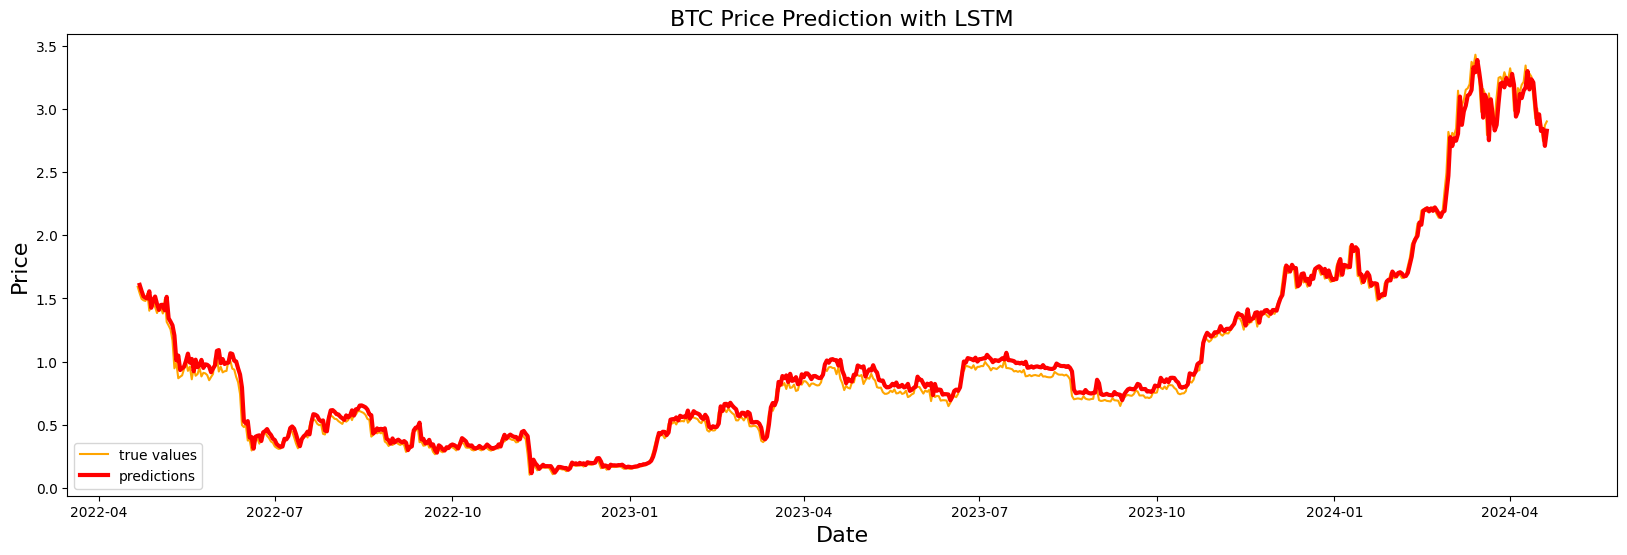

In [31]:
plt.figure(figsize=(20,6))
plt.plot(test_data['date'], test_data['price'], c='orange',label='true values')
plt.plot(X_test[sequence_length:], y_pred, lw=3, c='r',linestyle = '-', label='predictions')
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("BTC Price Prediction with LSTM", fontsize=16);

## RNN

In [32]:
sequence_length = 1

# Create TimeseriesGenerator for train and test data
train_generator = TimeseriesGenerator(train_series, train_series, 
                                      length=sequence_length, 
                                      sampling_rate = 1,
                                      stride=1,
                                      batch_size=256)

test_generator = TimeseriesGenerator(test_series, test_series, 
                                      length=sequence_length, 
                                      sampling_rate = 1,
                                      stride=1,
                                      batch_size=256)
# Define the LSTM model
model = Sequential([
    SimpleRNN(128, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model using the train_generator
model.fit(train_generator, epochs=300, verbose=0)

# Make predictions using the test_generator
y_pred = model.predict(test_generator)

# Flatten the predictions
y_pred = y_pred.flatten()

# Evaluate the model
mse = mean_squared_error(y_test[sequence_length:], y_pred)
mape = mean_absolute_percentage_error(y_test[sequence_length:], y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape*100)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step
Mean Squared Error: 0.0033077401477153373
Mean Absolute Percentage Error: 4.749447976857473


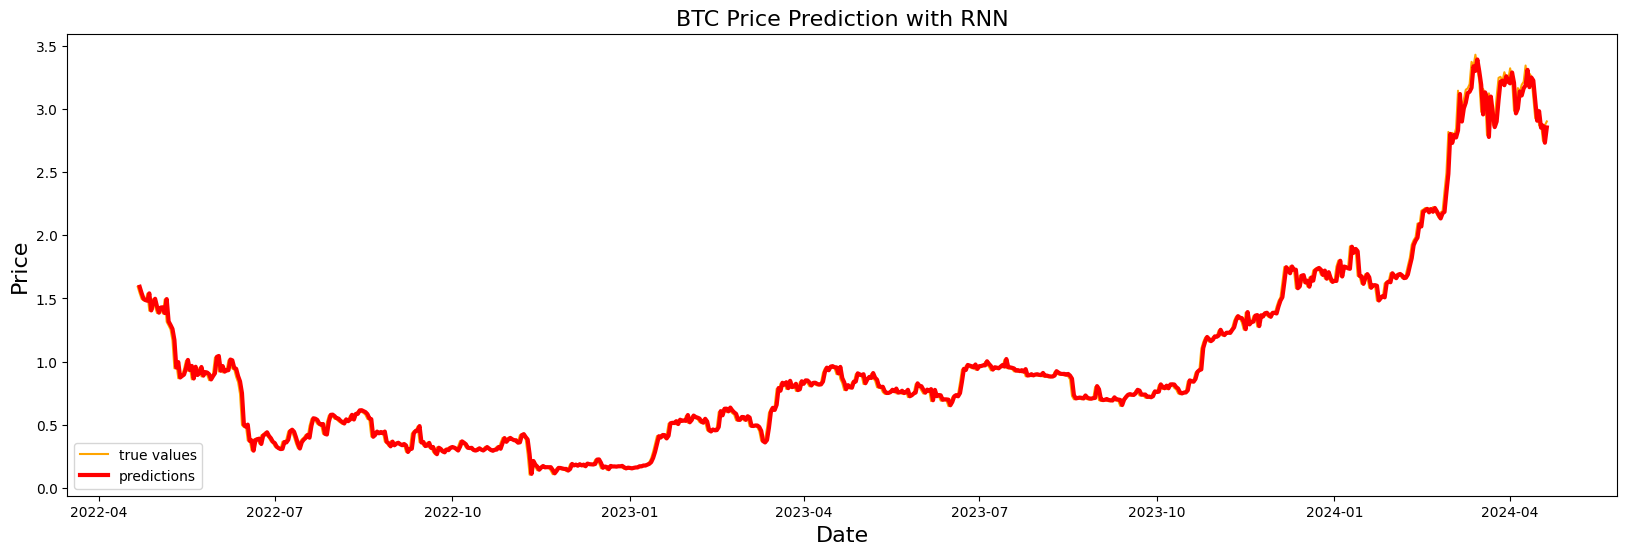

In [33]:
plt.figure(figsize=(20,6))
plt.plot(test_data['date'], test_data['price'], c='orange',label='true values')
plt.plot(X_test[sequence_length:], y_pred, lw=3, c='r',linestyle = '-', label='predictions')
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("BTC Price Prediction with RNN", fontsize=16);

## LSTM

In [34]:
sequence_length = 1

# Create TimeseriesGenerator for train and test data
train_generator = TimeseriesGenerator(train_series, train_series, 
                                      length=sequence_length, 
                                      sampling_rate = 1,
                                      stride=1,
                                      batch_size=256)

test_generator = TimeseriesGenerator(test_series, test_series, 
                                      length=sequence_length, 
                                      sampling_rate = 1,
                                      stride=1,
                                      batch_size=256)
# Define the LSTM model
model = Sequential([
    LSTM(128, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model using the train_generator
model.fit(train_generator, epochs=300, verbose=0)

# Make predictions using the test_generator
y_pred = model.predict(test_generator)

# Flatten the predictions
y_pred = y_pred.flatten()

# Evaluate the model
mse = mean_squared_error(y_test[sequence_length:], y_pred)
mape = mean_absolute_percentage_error(y_test[sequence_length:], y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape*100)


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step
Mean Squared Error: 0.006237569506017222
Mean Absolute Percentage Error: 9.819661340907086


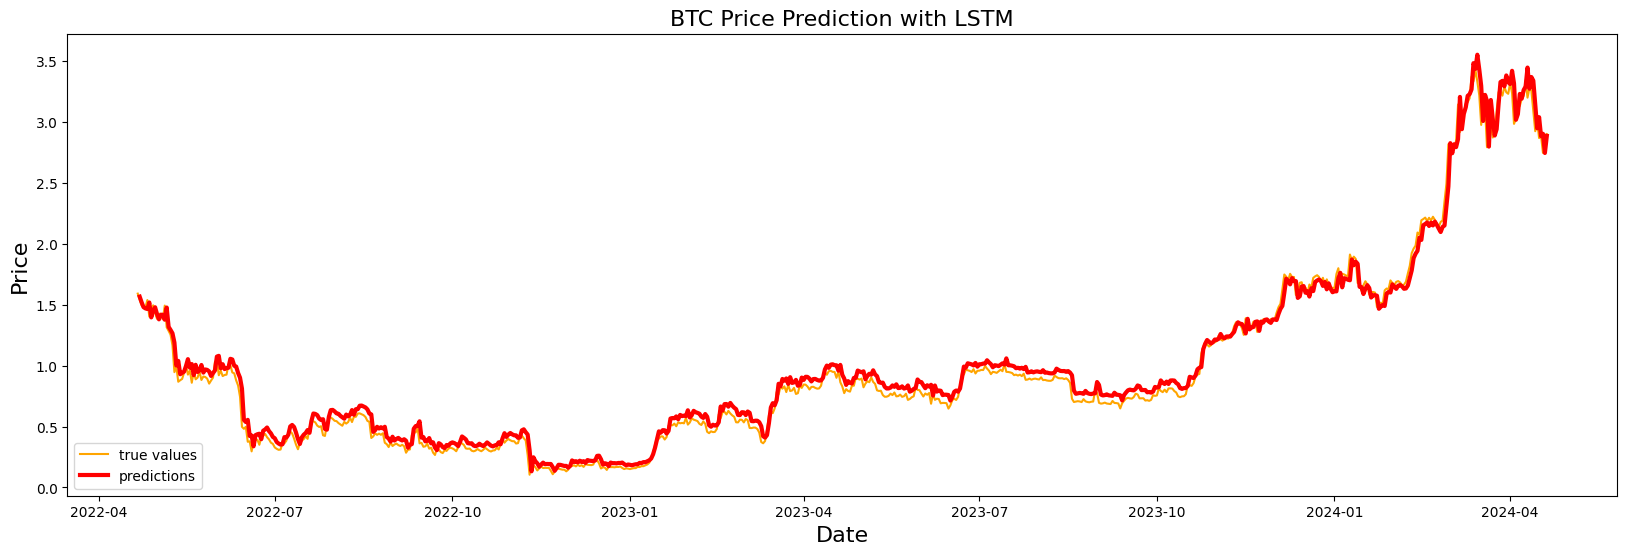

In [35]:
plt.figure(figsize=(20,6))
plt.plot(test_data['date'], test_data['price'], c='orange',label='true values')
plt.plot(X_test[sequence_length:], y_pred, lw=3, c='r',linestyle = '-', label='predictions')
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("BTC Price Prediction with LSTM", fontsize=16);

## GRU

In [36]:
sequence_length = 1

# Create TimeseriesGenerator for train and test data
train_generator = TimeseriesGenerator(train_series, train_series, 
                                      length=sequence_length, 
                                      sampling_rate = 1,
                                      stride=1,
                                      batch_size=256)

test_generator = TimeseriesGenerator(test_series, test_series, 
                                      length=sequence_length, 
                                      sampling_rate = 1,
                                      stride=1,
                                      batch_size=256)
# Define the LSTM model
model = Sequential([
    GRU(128, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model using the train_generator
model.fit(train_generator, epochs=300, verbose=0)

# Make predictions using the test_generator
y_pred = model.predict(test_generator)

# Flatten the predictions
y_pred = y_pred.flatten()

# Evaluate the model
mse = mean_squared_error(y_test[sequence_length:], y_pred)
mape = mean_absolute_percentage_error(y_test[sequence_length:], y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape*100)


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step
Mean Squared Error: 0.004632697902796168
Mean Absolute Percentage Error: 8.649611510209294


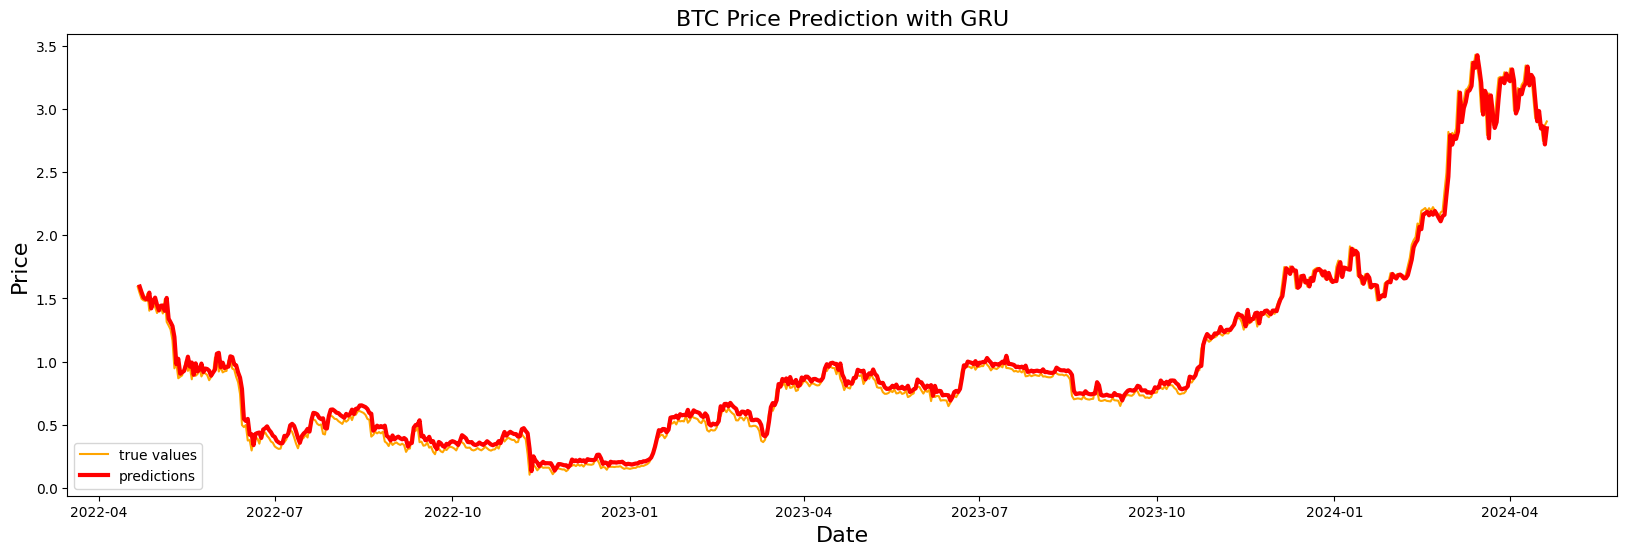

In [37]:
plt.figure(figsize=(20,6))
plt.plot(test_data['date'], test_data['price'], c='orange',label='true values')
plt.plot(X_test[sequence_length:], y_pred, lw=3, c='r',linestyle = '-', label='predictions')
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("BTC Price Prediction with GRU", fontsize=16);

## What happend if we change sequence_length to 7

In [38]:
sequence_length = 7

# Create TimeseriesGenerator for train and test data
train_generator = TimeseriesGenerator(train_series, train_series, 
                                      length=sequence_length, 
                                      sampling_rate = 1,
                                      stride=1,
                                      batch_size=256)

test_generator = TimeseriesGenerator(test_series, test_series, 
                                      length=sequence_length, 
                                      sampling_rate = 1,
                                      stride=1,
                                      batch_size=256)
# Define the LSTM model
model = Sequential([
    SimpleRNN(128, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model using the train_generator
model.fit(train_generator, epochs=300, verbose=0)

# Make predictions using the test_generator
y_pred = model.predict(test_generator)

# Flatten the predictions
y_pred = y_pred.flatten()

# Evaluate the model
mse = mean_squared_error(y_test[sequence_length:], y_pred)
mape = mean_absolute_percentage_error(y_test[sequence_length:], y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape*100)


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step
Mean Squared Error: 0.012145846749589136
Mean Absolute Percentage Error: 7.438287201933533


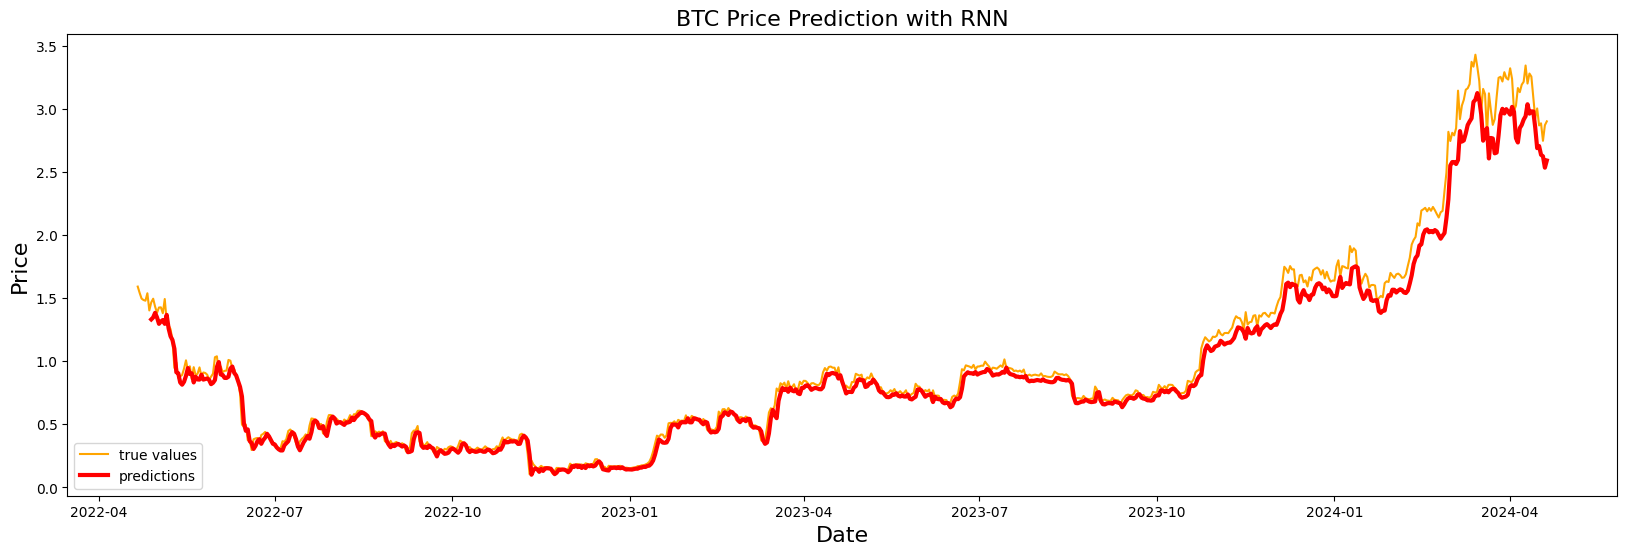

In [39]:
plt.figure(figsize=(20,6))
plt.plot(test_data['date'], test_data['price'], c='orange',label='true values')
plt.plot(X_test[sequence_length:], y_pred, lw=3, c='r',linestyle = '-', label='predictions')
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("BTC Price Prediction with RNN", fontsize=16);

## 365?

In [40]:
sequence_length = 365

# Create TimeseriesGenerator for train and test data
train_generator = TimeseriesGenerator(train_series, train_series, 
                                      length=sequence_length, 
                                      sampling_rate = 1,
                                      stride=1,
                                      batch_size=256)

test_generator = TimeseriesGenerator(test_series, test_series, 
                                      length=sequence_length, 
                                      sampling_rate = 1,
                                      stride=1,
                                      batch_size=256)
# Define the LSTM model
model = Sequential([
    SimpleRNN(128, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model using the train_generator
model.fit(train_generator, epochs=300, verbose=0)

# Make predictions using the test_generator
y_pred = model.predict(test_generator)

# Flatten the predictions
y_pred = y_pred.flatten()

# Evaluate the model
mse = mean_squared_error(y_test[sequence_length:], y_pred)
mape = mean_absolute_percentage_error(y_test[sequence_length:], y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape*100)


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 382ms/step
Mean Squared Error: 0.006114027558857119
Mean Absolute Percentage Error: 3.9418428776456578


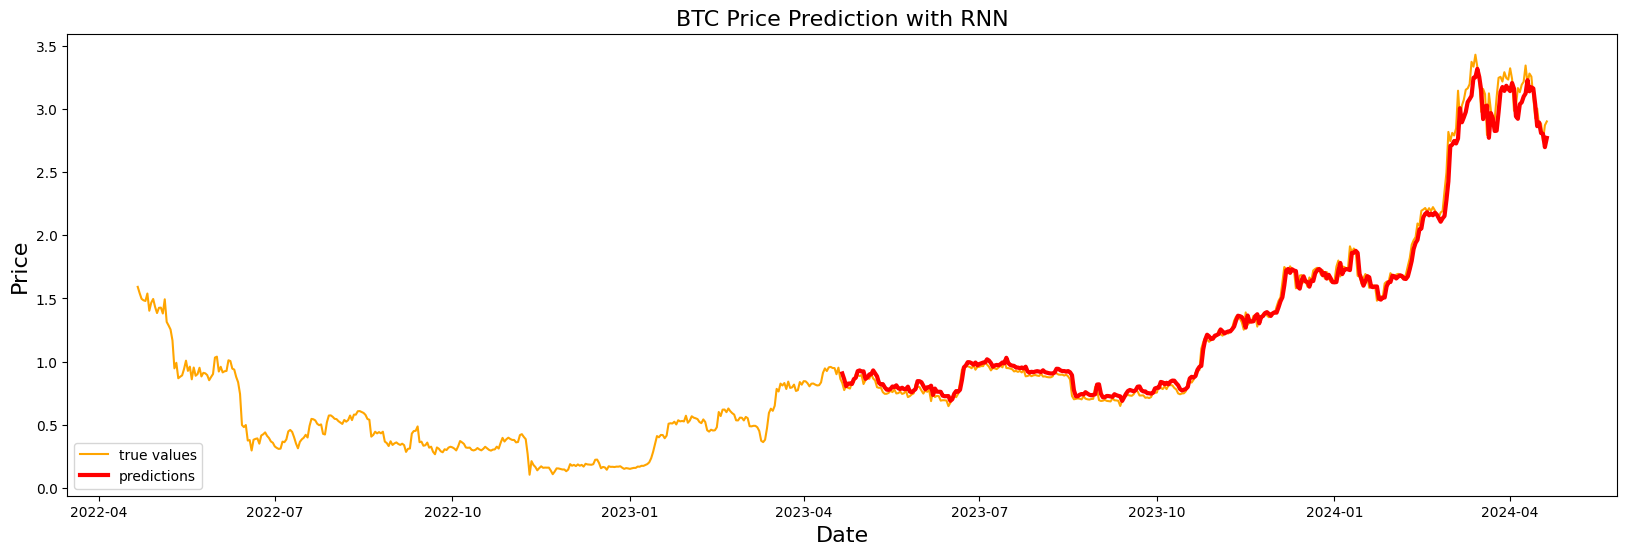

In [41]:
plt.figure(figsize=(20,6))
plt.plot(test_data['date'], test_data['price'], c='orange',label='true values')
plt.plot(X_test[sequence_length:], y_pred, lw=3, c='r',linestyle = '-', label='predictions')
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("BTC Price Prediction with RNN", fontsize=16);

# XGBoost

In [42]:
data

,date,price,year,trend,seasonal
0,2013-04-28 00:00:00+00:00,-0.800309,2013,119.831750,50.708370
1,2013-04-29 00:00:00+00:00,-0.799923,2013,119.831750,64.320956
2,2013-04-30 00:00:00+00:00,-0.800309,2013,119.831750,37.237184
3,2013-05-01 00:00:00+00:00,-0.801370,2013,119.831750,7.262416
4,2013-05-02 00:00:00+00:00,-0.802157,2013,119.831750,-109.144728
...,...,...,...,...,...
4004,2024-04-16 00:00:00+00:00,2.869552,2024,67487.441176,-101.985902
4005,2024-04-17 00:00:00+00:00,2.886362,2024,67487.441176,-8.241908
4006,2024-04-18 00:00:00+00:00,2.747697,2024,67487.441176,-32.489174
4007,2024-04-19 00:00:00+00:00,2.871350,2024,67487.441176,-9.472879


In [43]:
import xgboost as xgb

def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    X = pd.DataFrame()
    X['hour'] = df['date'].dt.hour
    X['dayofweek'] = df['date'].dt.dayofweek
    X['quarter'] = df['date'].dt.quarter
    X['month'] = df['date'].dt.month
    X['year'] = df['date'].dt.year
    X['dayofyear'] = df['date'].dt.dayofyear
    X['dayofmonth'] = df['date'].dt.day
    X['weekofyear'] = df['date'].dt.isocalendar().week

    if label:
        y = df[label]
        return X, y
    return X

In [44]:
X_train, y_train = create_features(train_data, label='price')
X_test, y_test = create_features(test_data, label='price')

In [45]:
model =  xgb.XGBRegressor(objective ='reg:linear',min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.001,
                max_depth = 5, alpha = 10, n_estimators = 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape*100)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [03:07:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Mean Squared Error: 1.0481223572152163
Mean Absolute Percentage Error: 64.79432548800803


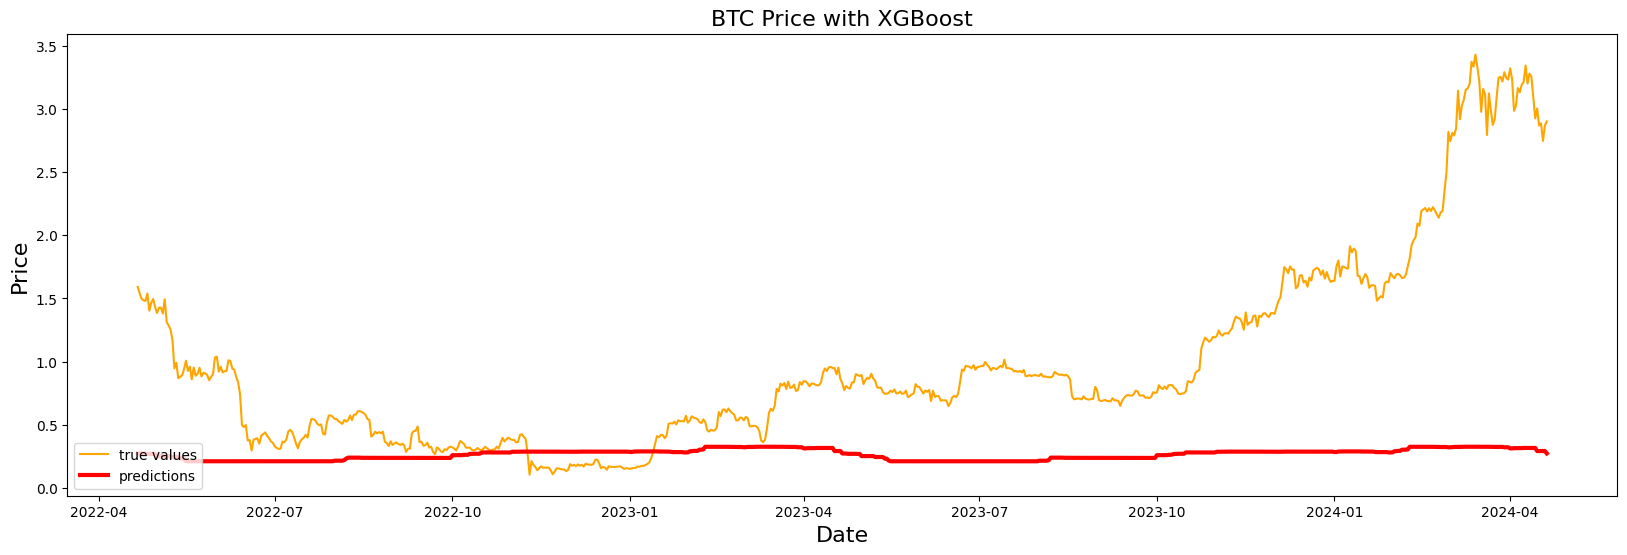

In [46]:
plt.figure(figsize=(20,6))
plt.plot(test_data['date'], test_data['price'], c='orange',label='true values')
plt.plot(test_data['date'], y_pred, lw=3, c='r',linestyle = '-', label='predictions')
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("BTC Price with XGBoost", fontsize=16);

## Add more features

In [47]:
import xgboost as xgb

def add_features(X, df):
    """
    Add more features
    """
    X['trend'] = df['trend']
    X['seasonal'] = df['seasonal']
    
    return X

In [48]:
X_train = add_features(X_train, train_data)
X_test= add_features(X_test, test_data)

In [49]:
model =  xgb.XGBRegressor(min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.001,
                max_depth = 10, alpha = 10, n_estimators = 100000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape*100)

Mean Squared Error: 0.29445293718098775
Mean Absolute Percentage Error: 112.84325266125843


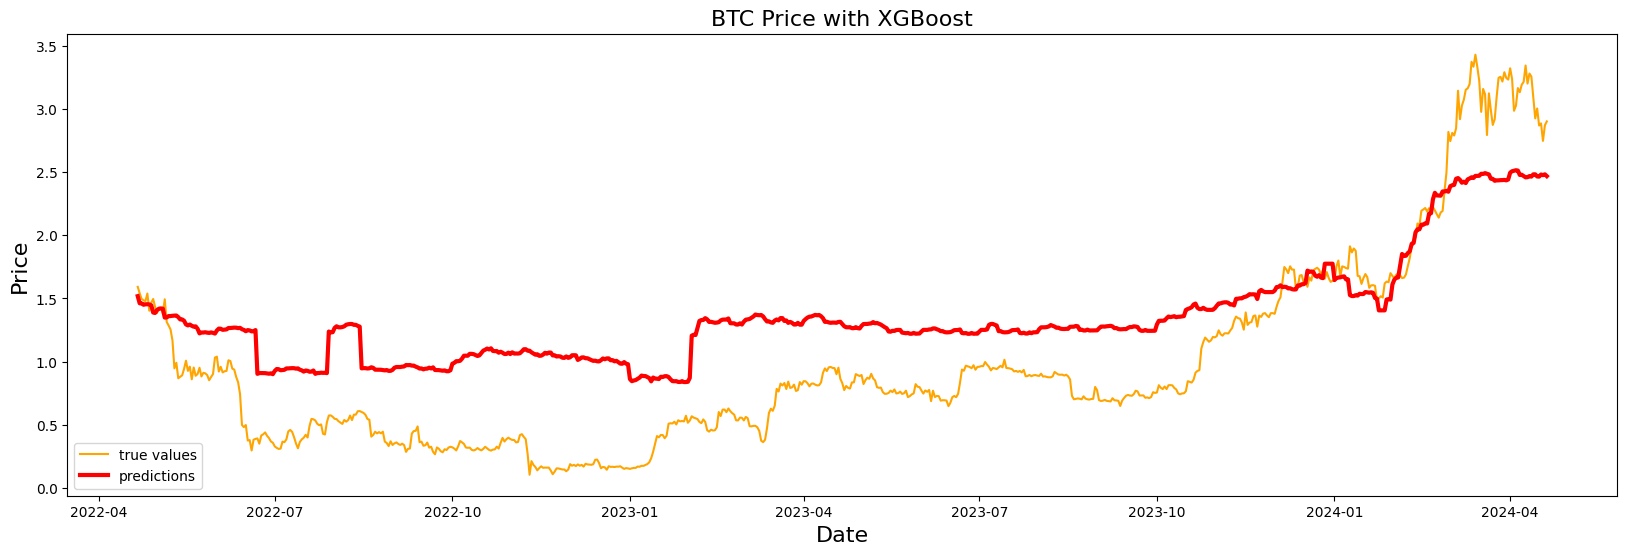

In [50]:
plt.figure(figsize=(20,6))
plt.plot(test_data['date'], test_data['price'], c='orange',label='true values')
plt.plot(test_data['date'], y_pred, lw=3, c='r',linestyle = '-', label='predictions')
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("BTC Price with XGBoost", fontsize=16);

In [51]:
def add_lag_features(X, data):
    X['lag_1'] = data['price'].shift(1)
    X['lag_2'] = data['price'].shift(2)
    X['lag_3'] = data['price'].shift(3)
    X['lag_4'] = data['price'].shift(4)
    X['lag_5'] = data['price'].shift(5)
    X['lag_6'] = data['price'].shift(6)
    X['lag_7'] = data['price'].shift(7)
    
    return X

In [52]:
X_train = add_lag_features(X_train, train_data)
X_test= add_lag_features(X_test, test_data)

In [53]:
model =  xgb.XGBRegressor(min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.001,
                max_depth = 10, alpha = 10, n_estimators = 100000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape*100)

Mean Squared Error: 0.04721479447653096
Mean Absolute Percentage Error: 21.873046570829572


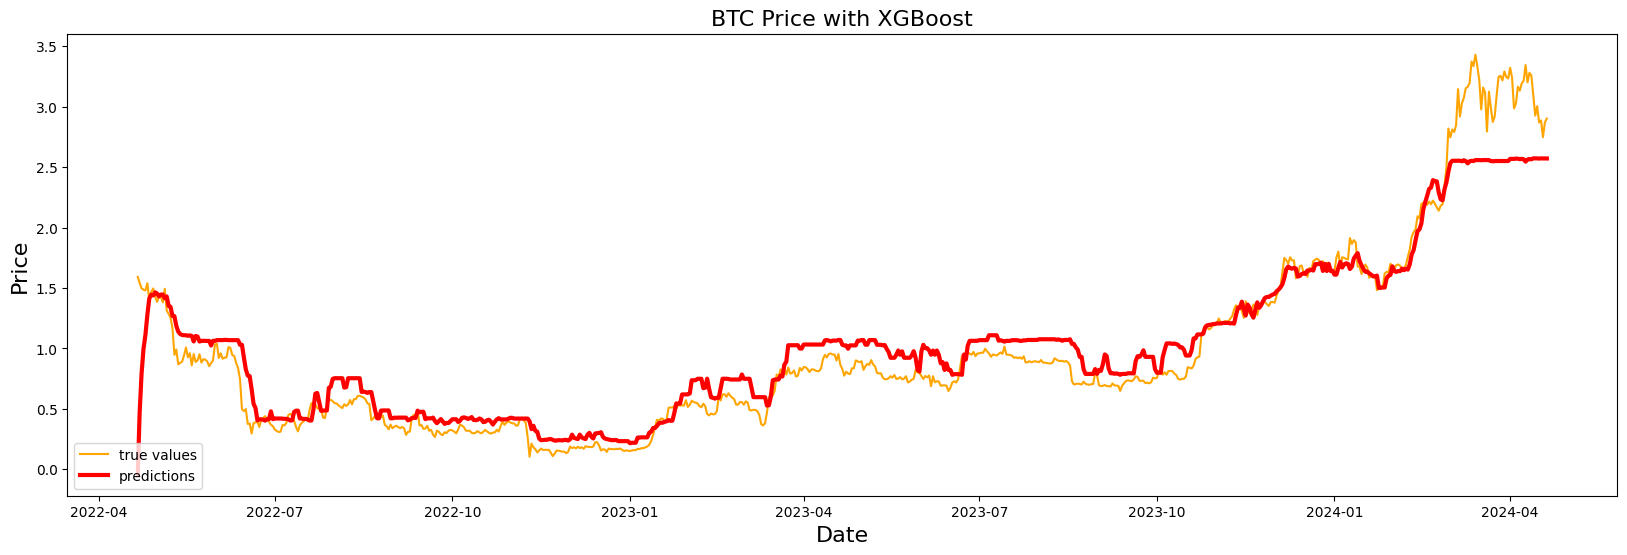

In [54]:
plt.figure(figsize=(20,6))
plt.plot(test_data['date'], test_data['price'], c='orange',label='true values')
plt.plot(test_data['date'], y_pred, lw=3, c='r',linestyle = '-', label='predictions')
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("BTC Price with XGBoost", fontsize=16);